In [1]:
import abc
import typing as tp
import collections as cs
import enum as en
import numpy as np
import itertools as it
import more_itertools as mit
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import os
import sympy as sp
import scipy as sci
import operator as op
import random as rnd
import copy as cp
import dataclasses as dc

In [2]:
from libs.environment.utils import *
from libs.utils.graph import *
from libs.environment.cost.tsp import *
from libs.solution.initial_solution_generators.heuristic import *
from libs.solution.initial_solution_generators.random import *
from libs.optimizers.algorithms.genetic.operators.mutations import *
from libs.optimizers.algorithms.genetic.operators.crossovers import *
from libs.optimizers.algorithms.genetic.operators.fixers import *
from libs.optimizers.algorithms.genetic.population import Population
from libs.optimizers.algorithms.genetic.population.generators import *
from libs.optimizers.algorithms.genetic.population.parent_selectors import *
from libs.optimizers.algorithms.genetic.population.population_selectors import *
from libs.optimizers.algorithms.genetic.operators.fixers import *

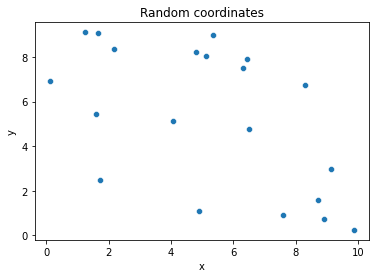

In [3]:
coords = coords_random(20, max_x=10, max_y=10)
ax = sns.scatterplot(x=coords.x, y=coords.y)
_ = ax.set_title("Random coordinates")

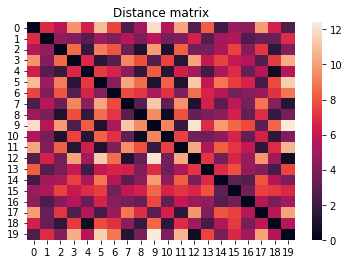

In [4]:
distances = coords_distances(coords, std_dev=0.1)
ax = sns.heatmap(distances)
_ = ax.set_title("Distance matrix")

In [5]:
mean_distance = distances.mean()
print(f"{mean_distance = }")

mean_distance = 5.36886147952393


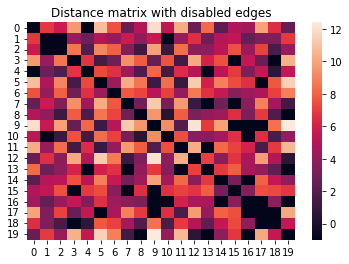

In [6]:
permitted_distances = disable_edges(distances, prohibition_p=0.1)
ax = sns.heatmap(permitted_distances)
_ = ax.set_title("Distance matrix with disabled edges")

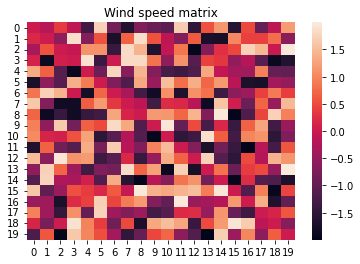

In [7]:
wind = wind_random(permitted_distances, max_velocity=2)
ax = sns.heatmap(wind)
_ = ax.set_title("Wind speed matrix")

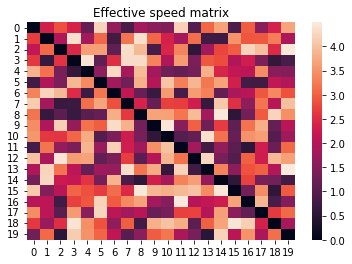

In [8]:
speed = 2.5
eff_speed = effective_speed(speed, wind)
ax = sns.heatmap(eff_speed)
_ = ax.set_title("Effective speed matrix")

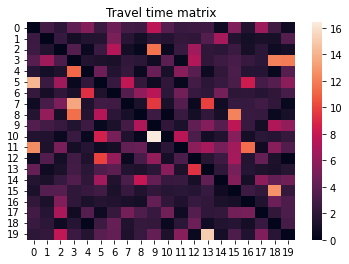

In [9]:
travel_t = travel_times(distances, eff_speed)
ax = sns.heatmap(travel_t)
_ = ax.set_title("Travel time matrix")

In [10]:
environment = EnvironmentTSPSimple(travel_t)

In [11]:
solution_creator = SolutionCreatorTSPSimpleHeuristicNN()
greedy_solution = solution_creator.create(environment, initial_vx=0)
greedy_solution

SolutionRepresentationTSP(representation=[0, 14, 16, 8, 10, 4, 18, 2, 7, 19, 12, 13, 1, 3, 11, 9, 5, 6, 17, 15])

In [12]:
vxs = list(range(coords.shape[0]))
print(
    f"{len(greedy_solution.representation) = }, success: {set(greedy_solution.representation) == set(vxs)}"
)

len(greedy_solution.representation) = 20, success: True


In [13]:
cost_calculator = TSPCostCalculatorSimple()
total_cost, step_cost = cost_calculator.calculate_total(greedy_solution, environment)
total_cost, step_cost

(18.68227662518898,
 deque([0.5888718901590133,
        0.9869877697383567,
        0.8848974819002506,
        0.11261926228902602,
        0.3599932987918702,
        0.37341967688400207,
        0.606809384445365,
        0.7909592893246367,
        0.3228354575058359,
        0.40838942616892276,
        1.6696500885888537,
        0.6447650414341434,
        0.9499229563680668,
        0.3699064813647103,
        0.5278839648694376,
        0.36745933206396175,
        2.3349237759985275,
        1.6337803865405285,
        4.748201660753469]))

In [14]:
for i, cost in enumerate(cost_calculator.stepper(greedy_solution, environment)):
    print(f"{i = }, {cost = }")

i = 0, cost = 0.5888718901590133
i = 1, cost = 0.9869877697383567
i = 2, cost = 0.8848974819002506
i = 3, cost = 0.11261926228902602
i = 4, cost = 0.3599932987918702
i = 5, cost = 0.37341967688400207
i = 6, cost = 0.606809384445365
i = 7, cost = 0.7909592893246367
i = 8, cost = 0.3228354575058359
i = 9, cost = 0.40838942616892276
i = 10, cost = 1.6696500885888537
i = 11, cost = 0.6447650414341434
i = 12, cost = 0.9499229563680668
i = 13, cost = 0.3699064813647103
i = 14, cost = 0.5278839648694376
i = 15, cost = 0.36745933206396175
i = 16, cost = 2.3349237759985275
i = 17, cost = 1.6337803865405285
i = 18, cost = 4.748201660753469


In [15]:
rnd_sol_creator = SolutionCreatorTSPSimpleRandom()
rnd_sol = rnd_sol_creator.create(environment, initial_vx=0)
print(
    f"{len(rnd_sol.representation) = }, success: {set(rnd_sol.representation) == set(vxs)}"
)

len(rnd_sol.representation) = 20, success: True


## Poisson distribution

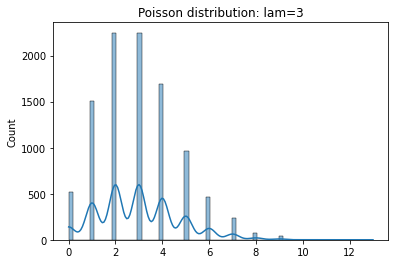

In [16]:
lam = 3
poisson_points = np.random.poisson(lam=lam, size=10000)
ax = sns.histplot(data=poisson_points, kde=True)
_ = ax.set_title(f"Poisson distribution: lam={lam}")

In [17]:
mutator_swap = MutatorHomogenousVectorSwap(probability=1, lam=1)
mutator_shuffle = MutatorHomogenousVectorShuffle(probability=1, lam=1)
chromosome = ChromosomeHomogenousVector(greedy_solution.representation)

In [18]:
mutated, _ = mutator_swap.mutate(chromosome)
print(f"{chromosome.sequence = }\n{mutated.sequence    = }")

chromosome.sequence = [0, 14, 16, 8, 10, 4, 18, 2, 7, 19, 12, 13, 1, 3, 11, 9, 5, 6, 17, 15]
mutated.sequence    = [0, 14, 16, 8, 15, 4, 18, 2, 7, 19, 12, 13, 1, 3, 11, 9, 5, 17, 6, 10]


In [19]:
mutated, _ = mutator_shuffle.mutate(chromosome)
print(f"{chromosome.sequence = }\n{mutated.sequence    = }")

chromosome.sequence = [0, 14, 16, 8, 10, 4, 18, 2, 7, 19, 12, 13, 1, 3, 11, 9, 5, 6, 17, 15]
mutated.sequence    = [0, 14, 16, 8, 10, 4, 18, 2, 1, 3, 11, 9, 5, 6, 17, 15, 7, 19, 12, 13]


In [20]:
for i in range(10):
    if i > 10:
        break
else:
    print("makapaka")

makapaka


In [21]:
print(f"success: {set(chromosome.sequence) == set(mutated.sequence)}")

success: True


In [22]:
crossover_normal = CrossoverHomogenousVector()
crossover_kpoint = CrossoverHomogenousVectorKPoint()
crossover_kpoint_random = CrossoverHomogenousVectorKPointPoisson(lam=0.5)

In [23]:
chromosome1 = ChromosomeHomogenousVector(greedy_solution.representation)
chromosome2 = ChromosomeHomogenousVector(rnd_sol.representation)

In [24]:
new_generation_normal = crossover_normal.execute(chromosome1, chromosome2)
new_generation_kpoint = crossover_kpoint.execute(chromosome1, chromosome2, k=3)
new_generation_kpoint_random = crossover_kpoint_random.execute(chromosome1, chromosome2)

In [25]:
print(
    f"parents:\n\t{chromosome1.sequence} (len: {len(chromosome1.sequence)})\n\t{chromosome2.sequence} (len: {len(chromosome2.sequence)})"
)
print(
    f"normal:\n\t{new_generation_normal[0].sequence} (len: {len(new_generation_normal[0].sequence)})\n\t{new_generation_normal[1].sequence} (len: {len(new_generation_normal[1].sequence)})"
)
print(
    f"k-point:\n\t{new_generation_kpoint[0].sequence} (len: {len(new_generation_kpoint[0].sequence)})\n\t{new_generation_kpoint[1].sequence} (len: {len(new_generation_kpoint[1].sequence)})"
)

parents:
	[0, 14, 16, 8, 10, 4, 18, 2, 7, 19, 12, 13, 1, 3, 11, 9, 5, 6, 17, 15] (len: 20)
	[0, 10, 14, 5, 8, 9, 4, 1, 2, 12, 17, 18, 19, 11, 7, 6, 15, 16, 3, 13] (len: 20)
normal:
	[7, 19, 12, 13, 1, 3, 11, 9, 5, 6, 17, 15, 0, 10, 14, 5, 8, 9, 4, 1] (len: 20)
	[2, 12, 17, 18, 19, 11, 7, 6, 15, 16, 3, 13, 0, 14, 16, 8, 10, 4, 18, 2] (len: 20)
k-point:
	[0, 10, 14, 5, 8, 9, 4, 1, 2, 12, 17, 13, 1, 3, 7, 6, 15, 16, 3, 13] (len: 20)
	[0, 14, 16, 8, 10, 4, 18, 2, 7, 19, 12, 18, 19, 11, 11, 9, 5, 6, 17, 15] (len: 20)


Note - Crossover is useless for TSP and other problems, where values can not repeat themselves.

In [26]:
bad_chromosome = cp.deepcopy(chromosome1)
bad_chromosome.sequence[2:6] = bad_chromosome.sequence[7:11]

In [27]:
fixer = ChromosomeFixerTSPSimple()

In [28]:
fixed_chromosome, should_die = fixer.fix(bad_chromosome, environment)
should_die, fixed_chromosome

(FixResult(fix_status=<FixStatus.SUCCESS: 1>, no_of_errors=0),
 ChromosomeHomogenousVector(sequence=[0, 14, 2, 7, 19, 12, 18, 4, 8, 10, 16, 13, 1, 3, 11, 9, 5, 6, 17, 15]))

In [29]:
print(f"success: {set(fixed_chromosome.sequence) == set(vxs)}")

success: True


## New population generation

In [30]:
POPULATION_SIZE = 10
solution_creator_heuristic = SolutionCreatorTSPSimpleHeuristicNN()
solution_creator_random = SolutionCreatorTSPSimpleRandom()
heuristic_solution = solution_creator.create(environment, initial_vx=0)
random_solutions = [
    solution_creator_random.create(environment, initial_vx=0) for _ in range(POPULATION_SIZE - 1)
]

In [31]:
population: Population = [ChromosomeHomogenousVector(sol.representation) for sol in mit.value_chain(heuristic_solution, random_solutions)]  # type: ignore
population

[ChromosomeHomogenousVector(sequence=[0, 14, 16, 8, 10, 4, 18, 2, 7, 19, 12, 13, 1, 3, 11, 9, 5, 6, 17, 15]),
 ChromosomeHomogenousVector(sequence=[0, 16, 17, 13, 19, 7, 14, 15, 3, 8, 4, 9, 5, 11, 12, 18, 1, 10, 2, 6]),
 ChromosomeHomogenousVector(sequence=[0, 11, 8, 10, 14, 2, 5, 17, 9, 18, 6, 16, 13, 1, 15, 12, 4, 7, 3, 19]),
 ChromosomeHomogenousVector(sequence=[0, 6, 18, 14, 5, 7, 1, 12, 17, 3, 4, 15, 8, 13, 10, 9, 19, 16, 2, 11]),
 ChromosomeHomogenousVector(sequence=[0, 19, 17, 7, 13, 8, 11, 5, 10, 6, 18, 9, 12, 4, 15, 16, 1, 2, 14, 3]),
 ChromosomeHomogenousVector(sequence=[0, 19, 18, 9, 7, 2, 15, 13, 17, 8, 16, 12, 1, 3, 10, 6, 11, 4, 14, 5]),
 ChromosomeHomogenousVector(sequence=[0, 11, 18, 9, 5, 12, 13, 7, 2, 17, 8, 1, 6, 19, 10, 16, 14, 4, 3, 15]),
 ChromosomeHomogenousVector(sequence=[0, 4, 6, 16, 1, 8, 19, 2, 9, 18, 15, 11, 5, 10, 3, 7, 13, 14, 12, 17]),
 ChromosomeHomogenousVector(sequence=[0, 1, 6, 11, 18, 4, 12, 9, 19, 7, 15, 14, 3, 17, 10, 2, 13, 5, 16, 8]),
 Chromosom

In [32]:
cost_calculator = TSPCostCalculatorSimple()
parent_selector = ParentSelectorElitistRandomized()
population_selector = PopulationSelectorProbabilistic()
mutators = [
    MutatorHomogenousVectorSwap(probability=0.1 , lam=0.5),
    MutatorHomogenousVectorShuffle(probability=0.1, lam=0.5)
]
crossover = CrossoverHomogenousVectorKPointPoisson(lam=0.5)
fixer = ChromosomeFixerTSPSimple()
generation_generator = PopulationGenerator()

max_cost = max(filter(lambda x: x > 0 and math.isfinite(x), np.nditer(environment.cost)))  # type: ignore
mean_cost = np.mean([x for x in np.nditer(environment.cost) if x > 0 and math.isfinite(x)])

invalidity_weight = 0.2 * mean_cost
error_weight = 0.05 * mean_cost
cost_weight = 1

In [33]:
next_generation, population_generation_data = generation_generator.generate(
    population,
    environment,
    cost_calculator,
    parent_selector,
    mutators,
    crossover,
    fixer,
    population_selector,
    invalidity_weight,
    error_weight,
    cost_weight
)
next_generation

[ChromosomeHomogenousVector(sequence=[0, 14, 16, 8, 10, 4, 18, 2, 7, 19, 12, 13, 1, 3, 11, 9, 5, 6, 17, 15]),
 ChromosomeHomogenousVector(sequence=[0, 4, 6, 16, 1, 8, 19, 2, 9, 18, 15, 11, 5, 10, 3, 7, 13, 14, 12, 17]),
 ChromosomeHomogenousVector(sequence=[0, 11, 18, 9, 5, 2, 15, 13, 17, 8, 16, 12, 1, 3, 10, 7, 14, 4, 19, 6]),
 ChromosomeHomogenousVector(sequence=[0, 1, 6, 11, 18, 4, 12, 9, 19, 7, 15, 14, 3, 17, 10, 2, 13, 5, 16, 8]),
 ChromosomeHomogenousVector(sequence=[0, 11, 8, 10, 14, 2, 5, 17, 9, 18, 6, 16, 13, 1, 15, 12, 4, 7, 3, 19]),
 ChromosomeHomogenousVector(sequence=[0, 14, 16, 8, 10, 4, 18, 2, 7, 19, 12, 13, 1, 15, 3, 9, 6, 11, 5, 17]),
 ChromosomeHomogenousVector(sequence=[0, 4, 6, 16, 1, 8, 19, 2, 9, 18, 15, 11, 5, 3, 7, 10, 12, 13, 17, 14]),
 ChromosomeHomogenousVector(sequence=[0, 19, 17, 7, 13, 8, 11, 5, 10, 6, 18, 9, 12, 4, 15, 16, 1, 2, 14, 3]),
 ChromosomeHomogenousVector(sequence=[0, 19, 17, 10, 14, 2, 5, 8, 9, 18, 6, 16, 13, 1, 15, 12, 4, 7, 3, 11]),
 Chromosom